In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variacao do Raio

In [3]:
caminho = 'TabelasVariacaoRaio/'
acuracia_teste_raio  = pd.read_csv(caminho+'acuracia_teste.csv')
acuracia_treino_raio = pd.read_csv(caminho+'acuracia_treino.csv')
norma_peso_raio      = pd.read_csv(caminho+'norma_peso.csv')
perda_teste_raio     = pd.read_csv(caminho+'perda_teste.csv')
perda_treino_raio    = pd.read_csv(caminho+'perda_treino.csv')
colunas = acuracia_treino_raio.columns
colunas_parametros = colunas[1:4]
colunas_epocas = colunas[5:-1]
colunas_epocas_int = np.array(list(map(int,colunas_epocas)))

In [4]:
acuracia_teste_raio.head()

,metodo,passo_inicial,iteracoes,raio,semente,1,2,3,4,5,...,92,93,94,95,96,97,98,99,100,tempo
0,FDIPA,0.23112,2,2,0,0.1071,0.1057,0.0942,0.0925,0.1057,...,0.0968,0.0968,0.1010,0.0927,0.1010,0.1010,0.0996,0.1126,0.1126,1044.338516
1,FDIPA,0.23112,2,2,1,0.1023,0.1023,0.0955,0.1016,0.1016,...,0.1137,0.1023,0.1137,0.1137,0.1037,0.1017,0.1137,0.1002,0.1017,1021.056653
2,FDIPA,0.23112,2,2,2,0.1127,0.1021,0.1052,0.0954,0.0954,...,0.0960,0.0905,0.1127,0.0950,0.1127,0.0905,0.1056,0.1127,0.0981,1020.503418
3,FDIPA,0.23112,2,2,3,0.1146,0.0982,0.0981,0.0988,0.0981,...,0.0981,0.0988,0.1043,0.0981,0.1043,0.1146,0.0982,0.0965,0.1146,1022.350853
4,FDIPA,0.23112,2,2,4,0.1018,0.0962,0.1020,0.0962,0.1050,...,0.0851,0.1050,0.0918,0.1139,0.1139,0.1139,0.1139,0.1050,0.0851,1024.071205


Função para transformar nosso Data Frame em uma serie com as colunas das épocas separadas.

In [5]:
# Para a seção de variação de raio
def df_to_time_series_raio(df, option, colunas_parametros, colunas_epocas) -> pd.core.frame.DataFrame:
    """
    Parametros
    ----------
    df : o dataframe que se deseja transformar em serie temporal
    Option : {1='acuracia_teste', 2='acuracia_treino', 3='noma_peso', 4='perda_teste', 5='perda_treino'}
        opção para o tipo de serie temporal tratada nesse contexto.  
    """

    options = {1:'acuracia_teste', 2:'acuracia_treino', 3:'norma_peso', 4:'perda_teste', 5:'perda_treino'}
    time_series = df.melt(id_vars = colunas_parametros, value_vars = colunas_epocas, var_name = 'epoca', value_name = options[option])
    time_series['epoca'] = pd.to_numeric(time_series['epoca'])
    time_series = time_series.sort_values(by=['raio', 'epoca'])
    
    return time_series

Obtendo o DataFrame de serie temporal para todos os data frames.

In [6]:
acuracia_teste_raio_ts  = df_to_time_series_raio(acuracia_teste_raio, 1, colunas_parametros, colunas_epocas)
acuracia_treino_raio_ts = df_to_time_series_raio(acuracia_treino_raio, 2, colunas_parametros, colunas_epocas)
norma_peso_raio_ts      = df_to_time_series_raio(norma_peso_raio, 3, colunas_parametros, colunas_epocas)
perda_teste_raio_ts     = df_to_time_series_raio(perda_teste_raio, 4, colunas_parametros, colunas_epocas)
perda_treino_raio_ts    = df_to_time_series_raio(perda_treino_raio, 5, colunas_parametros, colunas_epocas)
acuracia_teste_raio_ts.sample(10)

,passo_inicial,iteracoes,raio,epoca,acuracia_teste
5104,0.23112,2,2,35,0.1020
14465,0.23112,2,50,97,0.9527
13207,0.23112,2,2,89,0.1139
7872,0.23112,2,50,53,0.9542
5114,0.23112,2,2,35,0.1016
1529,0.23112,2,2,11,0.0992
7155,0.23112,2,100,48,0.9309
8233,0.23112,2,1000,55,0.8345
9026,0.23112,2,2,61,0.1037
8308,0.23112,2,10,56,0.0985


## Métricas ao longo das épocas

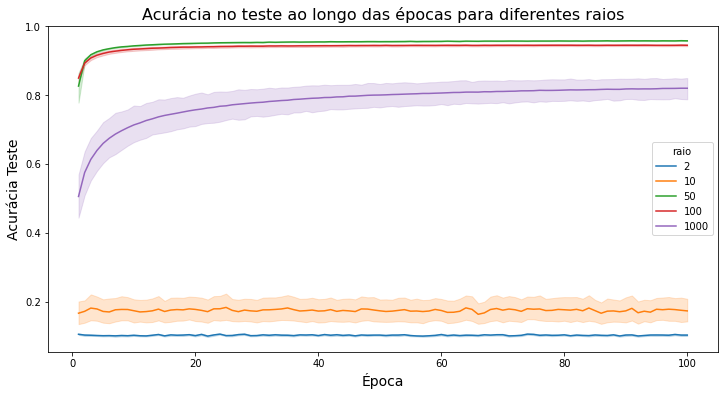

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="epoca", y="acuracia_teste", hue='raio', data=acuracia_teste_raio_ts, palette = "tab10")
plt.title('Acurácia no teste ao longo das épocas para diferentes raios', fontsize=16)
plt.xlabel("Época", fontsize=14)
plt.ylabel("Acurácia Teste", fontsize=14)
plt.show()

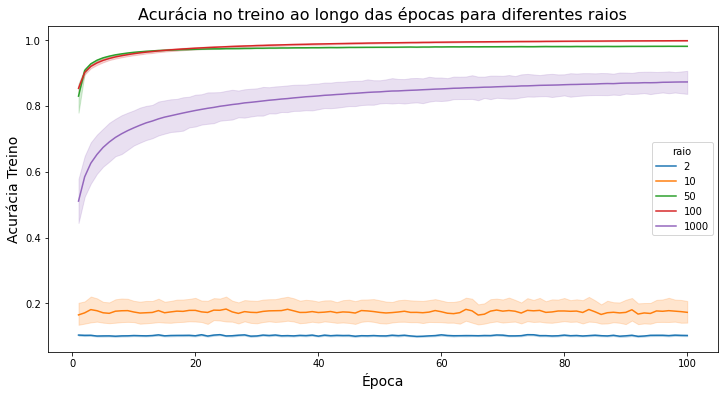

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="epoca", y="acuracia_treino", hue='raio', data=acuracia_treino_raio_ts, palette = "tab10")
plt.title('Acurácia no treino ao longo das épocas para diferentes raios',fontsize=16)
plt.xlabel("Época", fontsize=14)
plt.ylabel("Acurácia Treino", fontsize=14)
plt.show()

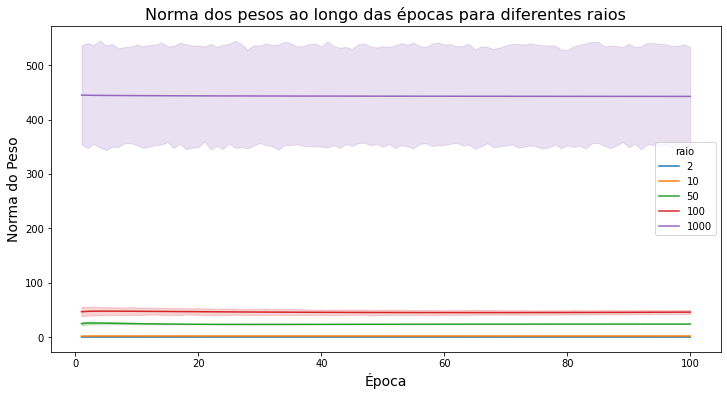

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="epoca", y='norma_peso', hue='raio', data=norma_peso_raio_ts, palette = "tab10")
plt.title('Norma dos pesos ao longo das épocas para diferentes raios',fontsize=16)
plt.xlabel("Época", fontsize=14)
plt.ylabel("Norma do Peso", fontsize=14)
plt.show()

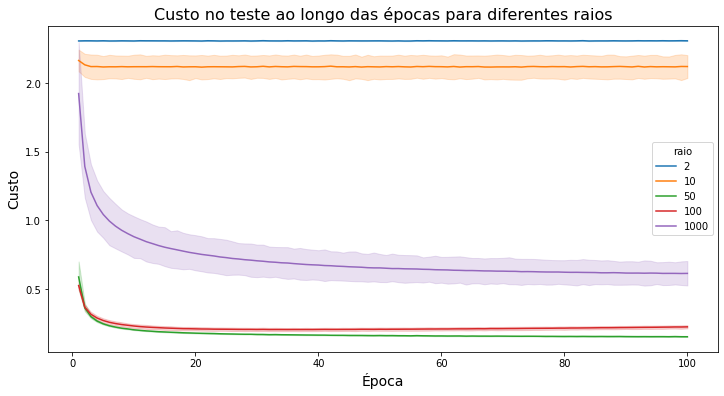

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='raio', data=perda_teste_raio_ts, palette = 'tab10')
plt.title('Custo no teste ao longo das épocas para diferentes raios',fontsize=16)
plt.xlabel('Época', fontsize=14)
plt.ylabel('Custo', fontsize=14)
plt.show()

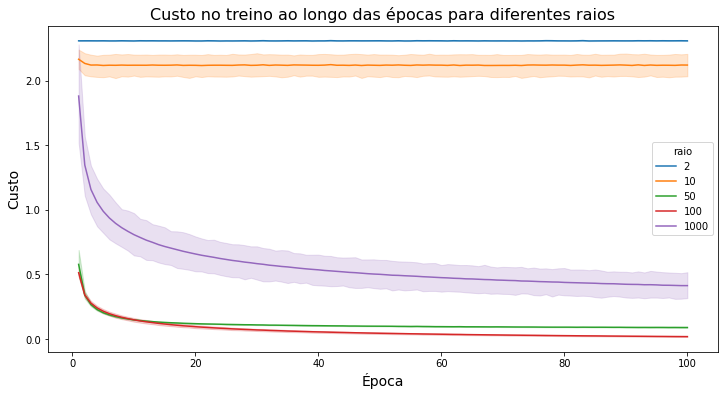

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='raio', data=perda_treino_raio_ts, palette = 'tab10')
plt.title('Custo no treino ao longo das épocas para diferentes raios',fontsize=16)
plt.xlabel('Época', fontsize=14)
plt.ylabel('Custo', fontsize=14)
plt.show()

## Acuracia treino X acurácia teste (média, desvio padrão, máximo e tempo)

In [12]:
left  = acuracia_treino_raio.groupby(by=['raio'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(acuracia_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std','max'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['raio', 'Acuracia Treino média', 'Acuracia Treino std']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['raio'], right_on = ['raio'])
acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,4))

<ipython-input-12-2093a0c79deb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std','max'])).reset_index()


,raio,Acuracia Treino média,Acuracia Treino std,Acuracia Teste_mean,Acuracia Teste_std,Acuracia Teste_max,tempo_mean,tempo_std,tempo_max
0,2,0.1025,0.0057,0.1024,0.0073,0.1159,955.4742,85.8645,1133.5703
1,10,0.1728,0.0949,0.1728,0.0950,0.3822,851.5179,292.9170,1921.3423
2,50,0.9809,0.0012,0.9574,0.0018,0.9602,1082.8635,196.9578,1251.5266
3,100,0.9978,0.0021,0.9445,0.0072,0.9562,904.9324,215.3353,1245.9237
4,1000,0.8725,0.0913,0.8197,0.0849,0.9357,767.1621,86.0768,899.5493


## Custo treino X custo teste (média, desvio padrão, mínimo e tempo)

In [13]:
left  = perda_treino_raio.groupby(by=['raio'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(perda_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std','min'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['raio', 'Custo Treino média', 'Custo Treino std']
perda_treino_vs_perda_teste = pd.merge(left, rigth, left_on = ['raio'], right_on = ['raio'])
perda_treino_vs_perda_teste = perda_treino_vs_perda_teste.apply(lambda x : round(x,4))
perda_treino_vs_perda_teste

<ipython-input-13-af89c460141a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std','min'])).reset_index()


,raio,Custo Treino média,Custo Treino std,Custo Teste_mean,Custo Teste_std,Custo Teste_min,tempo_mean,tempo_std,tempo_min
0,2,2.3078,0.0023,2.3083,0.0025,2.3028,955.4742,85.8645,721.2763
1,10,2.1203,0.2441,2.1208,0.2446,1.6630,851.5179,292.9170,706.4308
2,50,0.0890,0.0036,0.1517,0.0051,0.1386,1082.8635,196.9578,707.7122
3,100,0.0184,0.0088,0.2236,0.0332,0.1805,904.9324,215.3353,702.9527
4,1000,0.4131,0.2815,0.6132,0.2402,0.2929,767.1621,86.0768,704.4184


## Norma do peso inicial e final (min, max, media, desvio padrão)

In [14]:
tab_norma_peso = norma_peso_raio.groupby(by=['raio'])[['1','100']].agg(['min', 'max','mean','std']).reset_index()
tab_norma_peso = tab_norma_peso.apply(lambda x: round(x,4))
tab_norma_peso

raio        1                                    100                      \
             min       max      mean       std      min       max      mean   
0     2   0.0594    0.1797    0.1146    0.0311   0.0487    0.1957    0.1196   
1    10   0.1534    4.9117    1.5742    1.8675   0.1632    5.1084    1.8292   
2    50   7.1122   42.8719   24.5968   10.7259  23.3973   24.4013   23.8488   
3   100  13.5439   87.7254   46.5134   24.1258  36.8955   69.4264   45.8380   
4  1000  58.2171  887.7154  445.0257  268.6212  74.6481  877.8005  442.5983   

             
        std  
0    0.0268  
1    2.0491  
2    0.2383  
3   10.1491  
4  261.6764

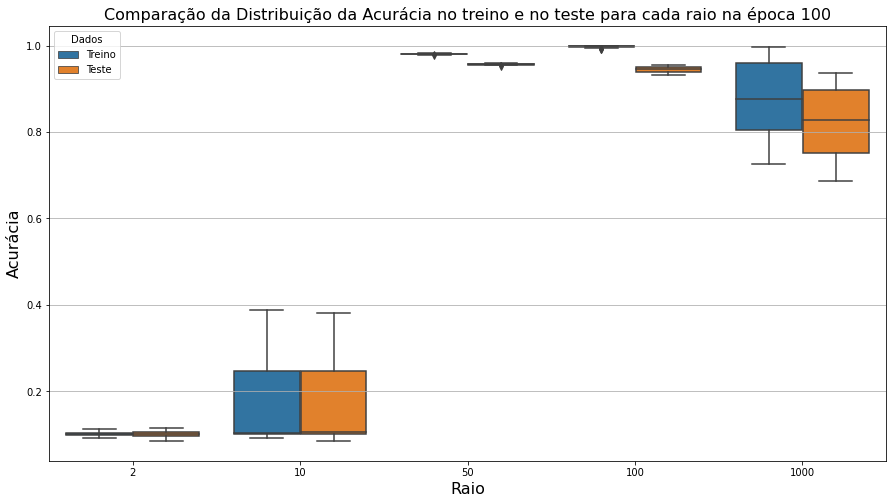

In [15]:
tab_aux1 = acuracia_treino_raio[['raio','semente','100']]
tab_aux1 = tab_aux1.assign(Dados='Treino')

tab_aux2 = acuracia_teste_raio[['raio','semente','100']]
tab_aux2 = tab_aux2.assign(Dados='Teste')
tab_aux = pd.concat([tab_aux1,tab_aux2],axis=0)

plt.figure(figsize=(15,8))
sns.boxplot(data = tab_aux, x = 'raio', y = '100', hue = 'Dados')
plt.title('Comparação da Distribuição da Acurácia no treino e no teste para cada raio na época 100', fontsize = 16)
plt.xlabel('Raio', fontsize = 16)
plt.ylabel('Acurácia', fontsize = 16)
plt.grid(axis='y')
plt.show()

In [16]:
tempo = acuracia_teste_raio['tempo'].sum()
print(f'Tempo total para realizar os treinos dessa base: {tempo:.3f} s = {tempo/3600:.3f} h')

Tempo total para realizar os treinos dessa base: 136858.502 s = 38.016 h


# Variação Iteração

In [17]:
caminho = 'TabelasVariacaoIteracao/'
acuracia_teste_iteracao  = pd.read_csv(caminho+'acuracia_teste.csv')
acuracia_treino_iteracao = pd.read_csv(caminho+'acuracia_treino.csv')
norma_peso_iteracao      = pd.read_csv(caminho+'norma_peso.csv')
perda_teste_iteracao     = pd.read_csv(caminho+'perda_teste.csv')
perda_treino_iteracao    = pd.read_csv(caminho+'perda_treino.csv')
colunas = acuracia_treino_iteracao.columns
colunas_parametros = colunas[1:4]
colunas_epocas = colunas[5:-1]
colunas_epocas_int = np.array(list(map(int,colunas_epocas)))

Dando uma olhada na base

In [18]:
acuracia_teste_iteracao.sample(5)

,metodo,passo_inicial,iteracoes,raio,semente,1,2,3,4,5,...,92,93,94,95,96,97,98,99,100,tempo
16,FDIPA,0.23112,1,49,16,0.8218,0.8946,0.9113,0.9164,0.9210,...,0.9493,0.9495,0.9503,0.9497,0.9475,0.9500,0.9499,0.9501,0.9495,661.693477
79,FDIPA,0.23112,5,49,19,0.9078,0.9239,0.9366,0.9376,0.9377,...,0.9579,0.9604,0.9602,0.9570,0.9588,0.9598,0.9575,0.9591,0.9581,1461.599544
42,FDIPA,0.23112,2,49,12,0.4384,0.8485,0.8963,0.9116,0.9224,...,0.9577,0.9563,0.9549,0.9577,0.9562,0.9567,0.9571,0.9589,0.9560,2015.912786
66,FDIPA,0.23112,5,49,6,0.9084,0.9254,0.9292,0.9386,0.9394,...,0.9558,0.9563,0.9547,0.9558,0.9559,0.9565,0.9562,0.9558,0.9563,1461.119078
8,FDIPA,0.23112,1,49,8,0.8241,0.8769,0.8959,0.9063,0.9146,...,0.9505,0.9511,0.9508,0.9493,0.9519,0.9519,0.9506,0.9499,0.9511,522.738666


Função semelhante a definida anteriormente mas agora para o contexto de variação da iteracao

In [19]:
# Para a seção de variação da iteracao
def df_to_time_series_iteracao(df, option, colunas_parametros, colunas_epocas) -> pd.core.frame.DataFrame:
    """
    Parametros
    ----------
    df : o dataframe que se deseja transformar em serie temporal
    Option : {1='acuracia_teste', 2='acuracia_treino', 3='noma_peso', 4='perda_teste', 5='perda_treino'}
        opção para o tipo de serie temporal tratada nesse contexto.  
    """

    options = {1:'acuracia_teste', 2:'acuracia_treino', 3:'norma_peso', 4:'perda_teste', 5:'perda_treino'}
    time_series = df.melt(id_vars = colunas_parametros, value_vars = colunas_epocas, var_name = 'epoca', value_name = options[option])
    time_series['epoca'] = pd.to_numeric(time_series['epoca'])
    time_series = time_series.sort_values(by=['iteracoes', 'epoca'])
    
    return time_series

Obtendo o DataFrame de serie temporal para todos os data frames.

In [20]:
acuracia_teste_iteracao_ts  = df_to_time_series_iteracao(acuracia_teste_iteracao, 1, colunas_parametros, colunas_epocas)
acuracia_treino_iteracao_ts = df_to_time_series_iteracao(acuracia_treino_iteracao, 2, colunas_parametros, colunas_epocas)
norma_peso_iteracao_ts      = df_to_time_series_iteracao(norma_peso_iteracao, 3, colunas_parametros, colunas_epocas)
perda_teste_iteracao_ts     = df_to_time_series_iteracao(perda_teste_iteracao, 4, colunas_parametros, colunas_epocas)
perda_treino_iteracao_ts    = df_to_time_series_iteracao(perda_treino_iteracao, 5, colunas_parametros, colunas_epocas)
acuracia_teste_iteracao_ts.sample(10)

,passo_inicial,iteracoes,raio,epoca,acuracia_teste
14807,0.23112,7,49,99,0.9587
11100,0.23112,1,49,75,0.9505
11094,0.23112,10,49,74,0.9576
5623,0.23112,5,49,38,0.9540
9998,0.23112,7,49,67,0.9574
3906,0.23112,1,49,27,0.9428
1682,0.23112,2,49,12,0.9384
5807,0.23112,7,49,39,0.9581
10052,0.23112,1,49,68,0.9451
14312,0.23112,5,49,96,0.9566


## Métricas ao longo das épocas

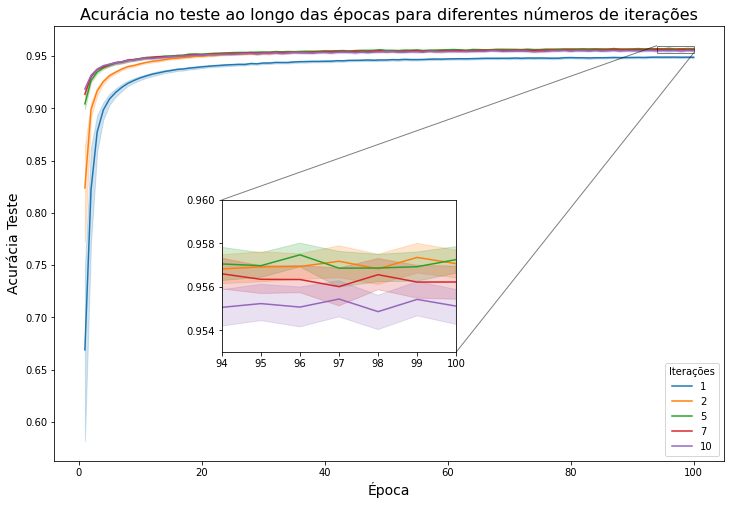

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="epoca", y="acuracia_teste", hue='iteracoes', data=acuracia_teste_iteracao_ts, palette = "tab10", ax = ax)
ax.set_title('Acurácia no teste ao longo das épocas para diferentes números de iterações', fontsize=16)
ax.set_xlabel("Época", fontsize=14)
ax.set_ylabel("Acurácia Teste", fontsize=14)
ax.legend(title = 'Iterações', loc='lower right')

axins = ax.inset_axes([0.25, 0.25, 0.35, 0.35])
sns.lineplot(x="epoca", y="acuracia_teste", hue='iteracoes', data=acuracia_teste_iteracao_ts, palette = "tab10", ax = axins)

axins.legend_.remove()
x1, x2, y1, y2 = 94, 100, 0.953, 0.96
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoIteracao/acuracia_teste.png')

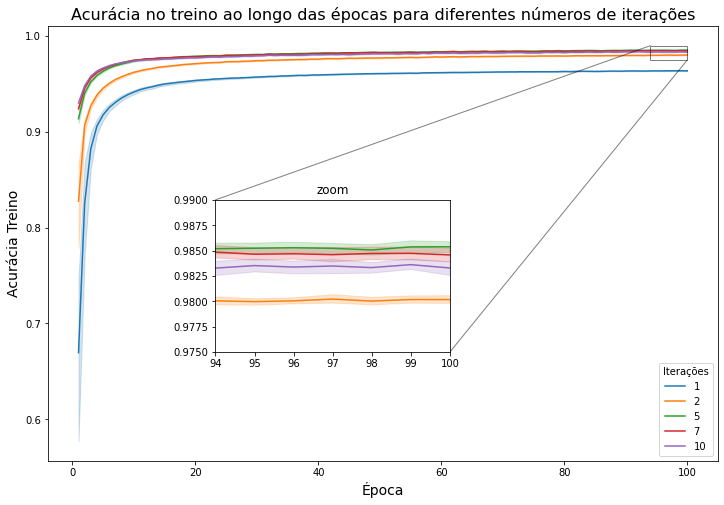

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="epoca", y="acuracia_treino", hue='iteracoes', data=acuracia_treino_iteracao_ts, palette = "tab10", ax = ax)
ax.set_title('Acurácia no treino ao longo das épocas para diferentes números de iterações',fontsize=16)
ax.set_xlabel("Época", fontsize=14)
ax.set_ylabel("Acurácia Treino", fontsize=14)
ax.legend(title = 'Iterações',loc='lower right')

axins = ax.inset_axes([0.25, 0.25, 0.35, 0.35])
sns.lineplot(x="epoca", y="acuracia_treino", hue='iteracoes', data=acuracia_treino_iteracao_ts, palette = "tab10", ax = axins)
axins.set_title('zoom')
axins.legend_.remove()
x1, x2, y1, y2 = 94, 100, 0.975, 0.99
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()


fig.savefig('Plots_VariacaoIteracao/acuracia_treino.png')

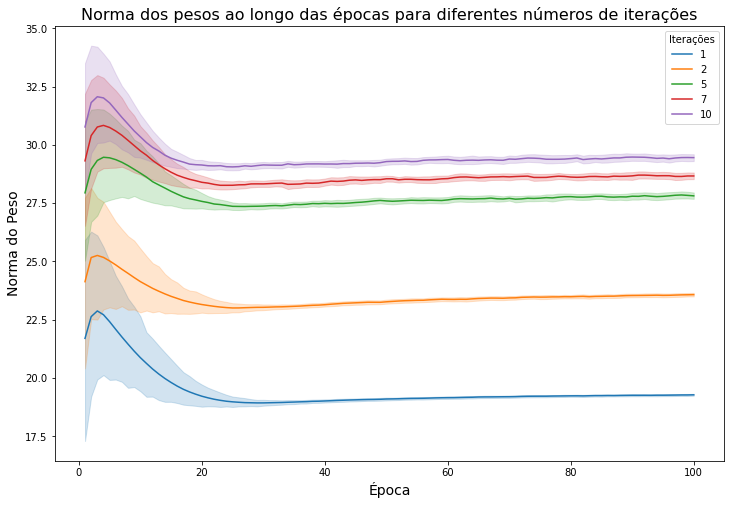

In [23]:
fig = plt.figure(figsize=(12, 8))
sns.lineplot(x="epoca", y='norma_peso', hue='iteracoes', data=norma_peso_iteracao_ts, palette = "tab10")
plt.title('Norma dos pesos ao longo das épocas para diferentes números de iterações',fontsize=16)
plt.xlabel("Época", fontsize=14)
plt.ylabel("Norma do Peso", fontsize=14)
plt.legend(title='Iterações')
plt.show()

fig.savefig('Plots_VariacaoIteracao/norma_peso.png')

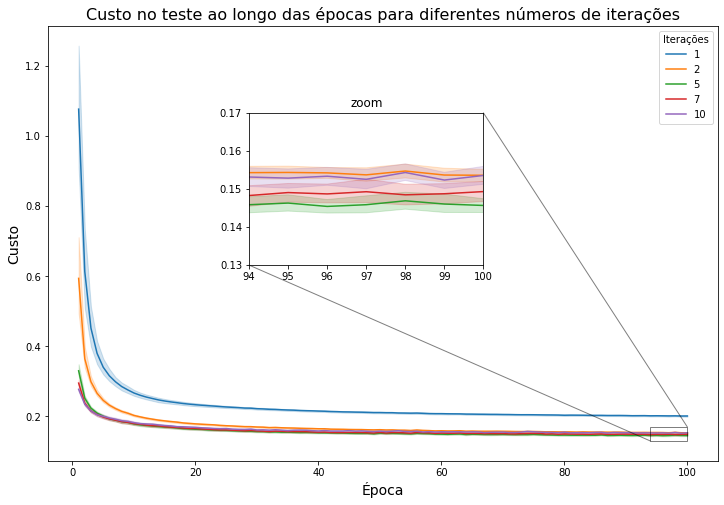

In [24]:
fig, ax = plt.subplots(figsize=[12, 8])
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='iteracoes', data=perda_teste_iteracao_ts, palette = 'tab10', ax = ax)
ax.set_title('Custo no teste ao longo das épocas para diferentes números de iterações',fontsize=16)
ax.set_xlabel('Época', fontsize=14)
ax.set_ylabel('Custo', fontsize=14)
ax.legend(title='Iterações')

axins = ax.inset_axes([0.3, 0.45, 0.35, 0.35])
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='iteracoes', data=perda_teste_iteracao_ts, palette = 'tab10', ax=axins)

axins.set_title('zoom')
x1, x2, y1, y2 = 94, 100, 0.13, 0.17
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
axins.legend_.remove()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()

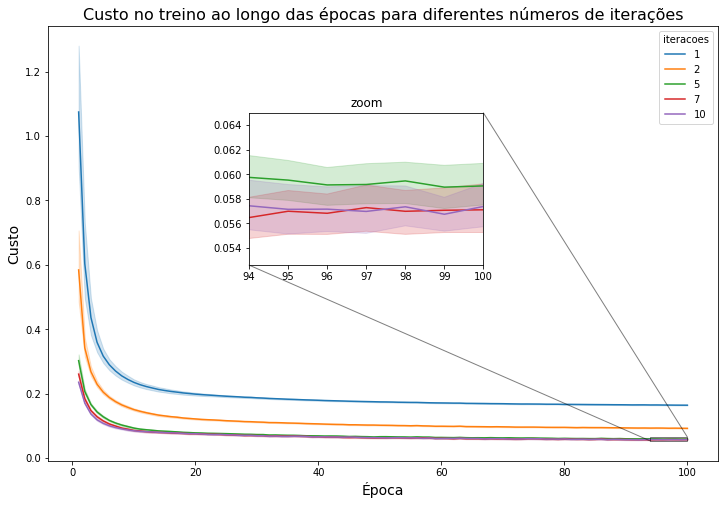

In [25]:
fig, ax = plt.subplots(figsize=[12, 8])
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='iteracoes', data=perda_treino_iteracao_ts, palette = 'tab10', ax=ax)
ax.set_title('Custo no treino ao longo das épocas para diferentes números de iterações', fontsize=16)
ax.set_xlabel('Época', fontsize=14)
ax.set_ylabel('Custo', fontsize=14)

axins = ax.inset_axes([0.3, 0.45, 0.35, 0.35])
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='iteracoes', data=perda_treino_iteracao_ts, palette = 'tab10', ax=axins)

axins.set_title('zoom')
x1, x2, y1, y2 = 94, 100, 0.0526, 0.065
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
axins.legend_.remove()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()

## Acuracia treino X acurácia teste (média, desvio padrão, máximo e tempo)

In [26]:
left  = acuracia_treino_iteracao.groupby(by=['iteracoes'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(acuracia_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['mean','std','max'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['iteracoes', 'Acuracia Treino média', 'Acuracia Treino std']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['iteracoes'], right_on = ['iteracoes'])
acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,4))

<ipython-input-26-8b84819fca6d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['mean','std','max'])).reset_index()


,iteracoes,Acuracia Treino média,Acuracia Treino std,Acuracia Teste_mean,Acuracia Teste_std,Acuracia Teste_max,tempo_mean,tempo_std,tempo_max
0,1,0.9638,0.0008,0.9489,0.0023,0.9529,672.5349,172.2094,1062.4890
1,2,0.9802,0.0011,0.9571,0.0018,0.9603,820.8799,303.7904,2015.9128
2,5,0.9854,0.0015,0.9573,0.0017,0.9608,2026.2178,1090.8440,4732.2760
3,7,0.9846,0.0020,0.9562,0.0022,0.9606,2120.6540,696.6246,5433.9115
4,10,0.9833,0.0018,0.9551,0.0023,0.9598,2641.8635,10.5252,2660.8932


## Custo treino X custo teste (média, desvio padrão, mínimo e tempo)

In [27]:
left  = perda_treino_iteracao.groupby(by=['iteracoes'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(perda_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['mean','std','min'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['iteracoes', 'Custo Treino média', 'Custo Treino std']
perda_treino_vs_perda_teste = pd.merge(left, rigth, left_on = ['iteracoes'], right_on = ['iteracoes'])
perda_treino_vs_perda_teste = perda_treino_vs_perda_teste.apply(lambda x : round(x,4))
perda_treino_vs_perda_teste

<ipython-input-27-8503a3d907aa>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_iteracao.groupby(by=['iteracoes'])['100','tempo'].agg(['mean','std','min'])).reset_index()


,iteracoes,Custo Treino média,Custo Treino std,Custo Teste_mean,Custo Teste_std,Custo Teste_min,tempo_mean,tempo_std,tempo_min
0,1,0.1640,0.0027,0.2014,0.0055,0.1896,672.5349,172.2094,480.9464
1,2,0.0921,0.0033,0.1536,0.0048,0.1415,820.8799,303.7904,720.4134
2,5,0.0591,0.0046,0.1457,0.0053,0.1365,2026.2178,1090.8440,1448.1466
3,7,0.0571,0.0053,0.1493,0.0073,0.1344,2120.6540,696.6246,1897.8209
4,10,0.0574,0.0051,0.1536,0.0069,0.1425,2641.8635,10.5252,2618.8451


## Norma do peso inicial e final (min, max, media, desvio padrão)

In [28]:
tab_norma_peso = norma_peso_iteracao.groupby(by=['iteracoes'])[['1','100']].agg(['min', 'max','mean','std']).reset_index()
tab_norma_peso = tab_norma_peso.apply(lambda x: round(x,4))
tab_norma_peso

iteracoes        1                                 100                    \
                 min      max     mean      std      min      max     mean   
0         1   2.5931  41.5488  21.7009  12.0193  19.0893  19.5075  19.2810   
1         2   6.7742  41.9536  24.1322  10.4874  23.0558  23.9952  23.5759   
2         5  17.0233  43.4297  27.9414   8.5329  27.0678  28.7872  27.8128   
3         7  19.5444  44.1219  29.3136   8.0468  27.9547  29.8208  28.6654   
4        10  21.7968  44.9223  30.7675   7.6117  28.6063  30.5647  29.4521   

           
      std  
0  0.1147  
1  0.2199  
2  0.4010  
3  0.3873  
4  0.4180

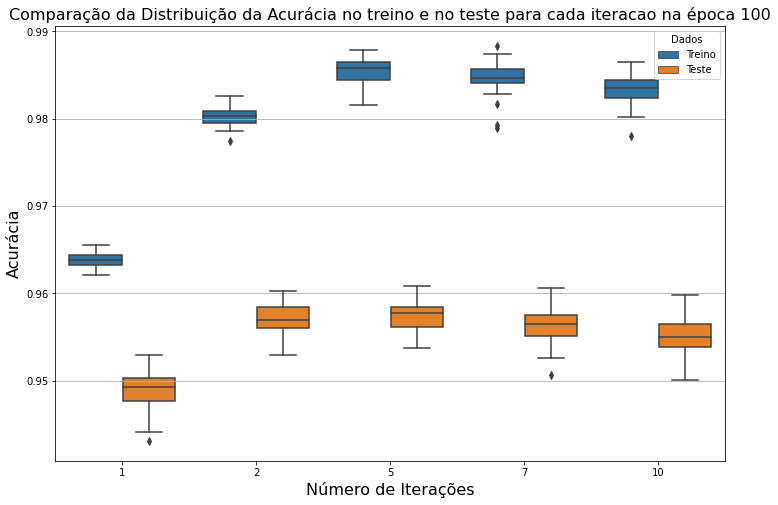

In [30]:
tab_aux1 = acuracia_treino_iteracao[['iteracoes','semente','100']]
tab_aux1 = tab_aux1.assign(Dados='Treino')

tab_aux2 = acuracia_teste_iteracao[['iteracoes','semente','100']]
tab_aux2 = tab_aux2.assign(Dados='Teste')
tab_aux = pd.concat([tab_aux1,tab_aux2],axis=0)

plt.figure(figsize=(12,8))
sns.boxplot(data = tab_aux, x = 'iteracoes', y = '100', hue = 'Dados')
plt.title('Comparação da Distribuição da Acurácia no treino e no teste para cada iteracao na época 100', fontsize = 16)
plt.xlabel('Número de Iterações', fontsize = 16)
plt.ylabel('Acurácia', fontsize = 16)
plt.grid(axis='y')
plt.show()

In [31]:
tempo = acuracia_teste_iteracao['tempo'].sum()
print(f'Tempo total para realizar os treinos dessa base: {tempo:.3f} s = {tempo/3600:.3f} h')

Tempo total para realizar os treinos dessa base: 248464.503 s = 69.018 h


# Variação Eta

In [33]:
caminho = 'TabelasVariacaoEta/'
acuracia_teste_eta  = pd.read_csv(caminho+'acuracia_teste.csv')
acuracia_treino_eta = pd.read_csv(caminho+'acuracia_treino.csv')
norma_peso_eta      = pd.read_csv(caminho+'norma_peso.csv')
perda_teste_eta     = pd.read_csv(caminho+'perda_teste.csv')
perda_treino_eta    = pd.read_csv(caminho+'perda_treino.csv')
colunas = acuracia_treino_eta.columns
colunas_parametros = colunas[1:4]
colunas_epocas = colunas[5:-1]
colunas_epocas_int = np.array(list(map(int,colunas_epocas)))

In [34]:
acuracia_teste_eta = acuracia_teste_eta.append(acuracia_teste_iteracao.query('raio == 49 and iteracoes == 2'))
acuracia_treino_eta = acuracia_treino_eta.append(acuracia_treino_iteracao.query('raio == 49 and iteracoes == 2'))
norma_peso_eta     = norma_peso_eta.append(norma_peso_iteracao.query('raio == 49 and iteracoes == 2'))
perda_teste_eta    = perda_teste_eta.append(perda_teste_iteracao.query('raio == 49 and iteracoes == 2'))
perda_treino_eta   = perda_treino_eta.append(perda_treino_iteracao.query('raio == 49 and iteracoes == 2'))

## Dando uma olhada na base

In [35]:
acuracia_teste_eta.head()

,metodo,passo_inicial,iteracoes,raio,semente,1,2,3,4,5,...,92,93,94,95,96,97,98,99,100,tempo
0,FDIPA,0.01,2,49,0,0.3070,0.4565,0.5494,0.6068,0.6666,...,0.9222,0.9230,0.9221,0.9228,0.9228,0.9240,0.9240,0.9240,0.9236,2413.163610
1,FDIPA,0.01,2,49,1,0.1167,0.1919,0.4038,0.5222,0.5497,...,0.9344,0.9344,0.9350,0.9350,0.9352,0.9347,0.9358,0.9357,0.9361,1535.943518
2,FDIPA,0.01,2,49,2,0.2929,0.4657,0.5287,0.5959,0.6392,...,0.9251,0.9252,0.9248,0.9256,0.9255,0.9256,0.9261,0.9259,0.9268,779.796806
3,FDIPA,0.01,2,49,3,0.1146,0.1146,0.1146,0.1146,0.1146,...,0.9150,0.9158,0.9171,0.9166,0.9174,0.9182,0.9188,0.9200,0.9200,1025.752975
4,FDIPA,0.01,2,49,4,0.1324,0.2368,0.3002,0.3444,0.4169,...,0.9309,0.9312,0.9318,0.9317,0.9320,0.9319,0.9322,0.9321,0.9330,981.459803


Função semelhante a definida anteriormente mas agora para o contexto de variação do eta

In [36]:
# Para a seção de variação de eta
def df_to_time_series_eta(df, option, colunas_parametros, colunas_epocas) -> pd.core.frame.DataFrame:
    """
    Parametros
    ----------
    df : o dataframe que se deseja transformar em serie temporal
    Option : {1='acuracia_teste', 2='acuracia_treino', 3='noma_peso', 4='perda_teste', 5='perda_treino'}
        opção para o tipo de serie temporal tratada nesse contexto.  
    """

    options = {1:'acuracia_teste', 2:'acuracia_treino', 3:'norma_peso', 4:'perda_teste', 5:'perda_treino'}
    time_series = df.melt(id_vars = colunas_parametros, value_vars = colunas_epocas, var_name = 'epoca', value_name = options[option])
    time_series['epoca'] = pd.to_numeric(time_series['epoca'])
    time_series = time_series.sort_values(by=['passo_inicial', 'epoca'])
    
    return time_series

Obtendo o DataFrame de serie temporal para todos os data frames.

In [37]:
acuracia_teste_eta_ts  = df_to_time_series_eta(acuracia_teste_eta, 1, colunas_parametros, colunas_epocas)
acuracia_treino_eta_ts = df_to_time_series_eta(acuracia_treino_eta, 2, colunas_parametros, colunas_epocas)
norma_peso_eta_ts      = df_to_time_series_eta(norma_peso_eta, 3, colunas_parametros, colunas_epocas)
perda_teste_eta_ts     = df_to_time_series_eta(perda_teste_eta, 4, colunas_parametros, colunas_epocas)
perda_treino_eta_ts    = df_to_time_series_eta(perda_treino_eta, 5, colunas_parametros, colunas_epocas)
acuracia_teste_eta_ts.sample(10)

,passo_inicial,iteracoes,raio,epoca,acuracia_teste
5301,0.10000,2,49,36,0.9513
9344,0.10000,2,49,63,0.9547
9159,0.01000,2,49,62,0.9167
7998,0.10000,2,49,54,0.9523
9507,0.10000,2,49,64,0.9535
3648,0.10000,2,49,25,0.9463
9276,0.23112,2,49,62,0.9558
8967,1.00000,2,49,60,0.9492
536,0.50000,2,49,4,0.9399
11430,0.10000,2,49,77,0.9550


## Métricas ao longo das épocas

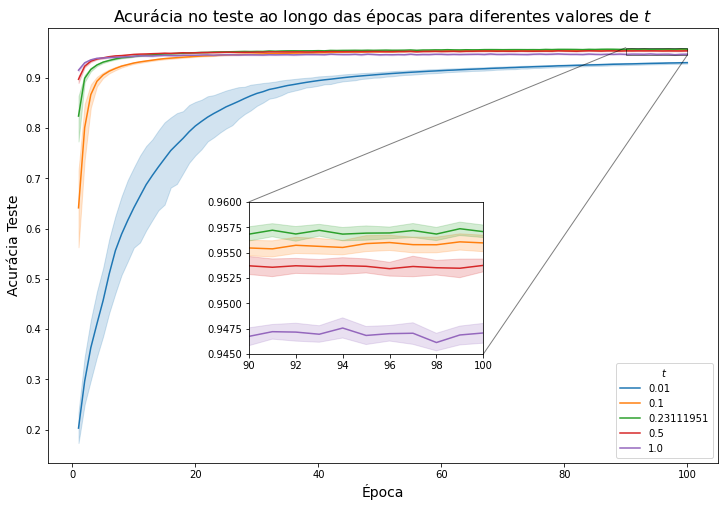

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="epoca", y="acuracia_teste", hue='passo_inicial', data=acuracia_teste_eta_ts, palette = "tab10", ax=ax)
ax.set_title('Acurácia no teste ao longo das épocas para diferentes valores de $t$', fontsize=16)
ax.set_xlabel("Época", fontsize=14)
ax.set_ylabel("Acurácia Teste", fontsize=14)
ax.legend(title = '$t$', loc='lower right')

axins = ax.inset_axes([0.30, 0.25, 0.35, 0.35])
sns.lineplot(x="epoca", y="acuracia_teste", hue='passo_inicial', data=acuracia_teste_eta_ts, palette = "tab10", ax = axins)

axins.legend_.remove()
x1, x2, y1, y2 = 90, 100, 0.945, 0.96
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoEta/acuracia_teste.png')

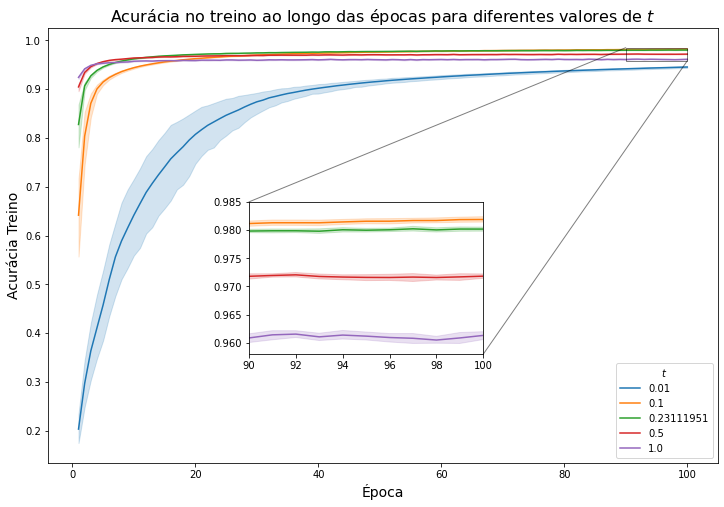

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="epoca", y="acuracia_treino", hue='passo_inicial', data=acuracia_treino_eta_ts, palette = "tab10", ax=ax)
ax.set_title('Acurácia no treino ao longo das épocas para diferentes valores de $t$', fontsize=16)
ax.set_xlabel("Época", fontsize=14)
ax.set_ylabel("Acurácia Treino", fontsize=14)
ax.legend(title = '$t$', loc='lower right')

axins = ax.inset_axes([0.30, 0.25, 0.35, 0.35])
sns.lineplot(x="epoca", y="acuracia_treino", hue='passo_inicial', data=acuracia_treino_eta_ts, palette = "tab10", ax = axins)

axins.legend_.remove()
x1, x2, y1, y2 = 90, 100, 0.958, 0.985
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoEta/acuracia_treino.png')

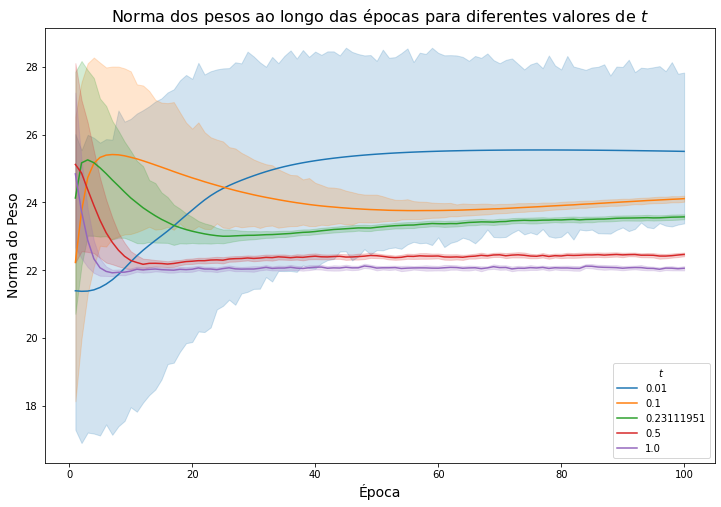

In [53]:
fig = plt.figure(figsize=(12, 8))
sns.lineplot(x="epoca", y='norma_peso', hue='passo_inicial', data=norma_peso_eta_ts, palette = "tab10")
plt.title('Norma dos pesos ao longo das épocas para diferentes valores de $t$',fontsize=16)
plt.xlabel("Época", fontsize=14)
plt.ylabel("Norma do Peso", fontsize=14)
plt.legend(title='$t$', loc='lower right')
plt.show()

fig.savefig('Plots_VariacaoEta/norma_peso.png')

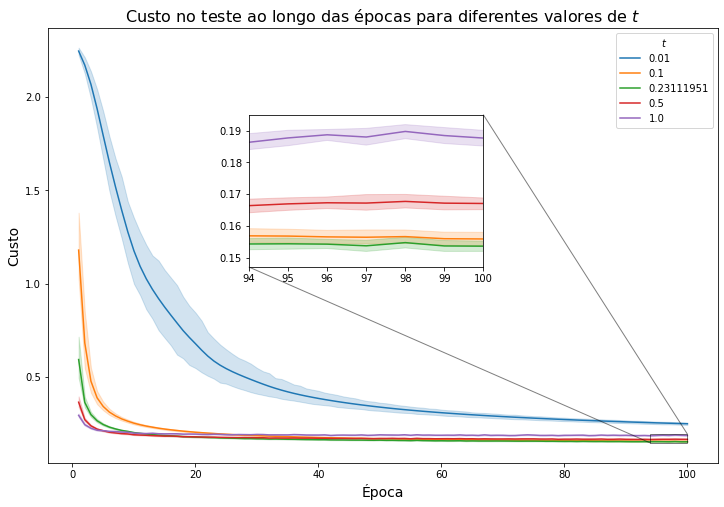

In [57]:
fig, ax = plt.subplots(figsize=[12, 8])
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='passo_inicial', data=perda_teste_eta_ts, palette = 'tab10', ax = ax)
ax.set_title('Custo no teste ao longo das épocas para diferentes valores de $t$',fontsize=16)
ax.set_xlabel('Época', fontsize=14)
ax.set_ylabel('Custo', fontsize=14)
ax.legend(title='$t$', loc='upper right')

axins = ax.inset_axes([0.3, 0.45, 0.35, 0.35])
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='passo_inicial', data=perda_teste_eta_ts, palette = 'tab10', ax=axins)

# axins.set_title('zoom')
x1, x2, y1, y2 = 94, 100, 0.147, 0.195
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
axins.legend_.remove()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoEta/perda_teste.png')

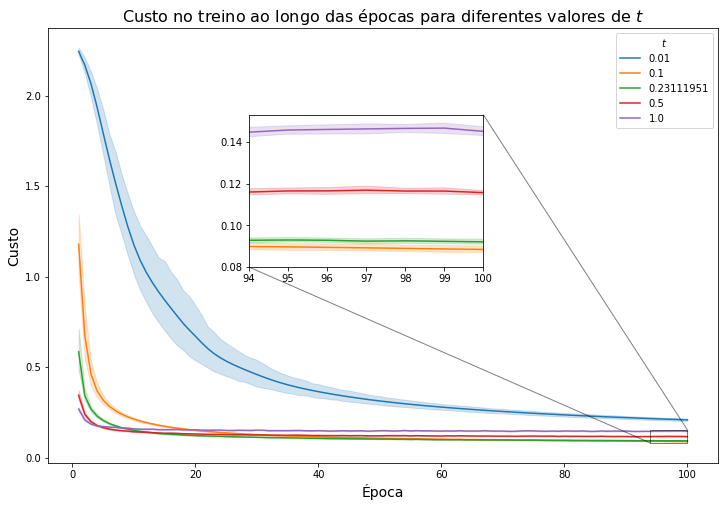

In [60]:
fig, ax = plt.subplots(figsize=[12, 8])
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='passo_inicial', data=perda_treino_eta_ts, palette = 'tab10', ax = ax)
ax.set_title('Custo no treino ao longo das épocas para diferentes valores de $t$',fontsize=16)
ax.set_xlabel('Época', fontsize=14)
ax.set_ylabel('Custo', fontsize=14)
ax.legend(title='$t$', loc='upper right')

axins = ax.inset_axes([0.3, 0.45, 0.35, 0.35])
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='passo_inicial', data=perda_treino_eta_ts, palette = 'tab10', ax=axins)

# axins.set_title('zoom')
x1, x2, y1, y2 = 94, 100, 0.08, 0.153
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xlabel('')
axins.set_ylabel('')
axins.legend_.remove()
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig('Plots_VariacaoEta/perda_treino.png')

## Acuracia treino X acurácia teste (média, desvio padrão, máximo e tempo)

In [61]:
left  = acuracia_treino_eta.groupby(by=['passo_inicial'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(acuracia_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std','max'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['passo_inicial', 'Acuracia Treino média', 'Acuracia Treino std']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['passo_inicial'], right_on = ['passo_inicial'])
acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,4))

<ipython-input-61-ed2038e194e2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std','max'])).reset_index()


,passo_inicial,Acuracia Treino média,Acuracia Treino std,Acuracia Teste_mean,Acuracia Teste_std,Acuracia Teste_max,tempo_mean,tempo_std,tempo_max
0,0.0100,0.9454,0.0050,0.9302,0.0052,0.9390,1064.1905,290.0341,2413.1636
1,0.1000,0.9819,0.0014,0.9560,0.0022,0.9592,955.7045,155.3519,1340.7380
2,0.2311,0.9802,0.0011,0.9571,0.0018,0.9603,820.8799,303.7904,2015.9128
3,0.5000,0.9718,0.0011,0.9537,0.0018,0.9571,833.3989,74.7782,1012.0714
4,1.0000,0.9613,0.0020,0.9471,0.0028,0.9520,716.5994,3.8090,728.2404


## Custo treino X custo teste (média, desvio padrão, mínimo e tempo)

In [62]:
left  = perda_treino_eta.groupby(by=['passo_inicial'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(perda_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std','min'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['passo_inicial', 'Custo Treino média', 'Custo Treino std']
perda_treino_vs_perda_teste = pd.merge(left, rigth, left_on = ['passo_inicial'], right_on = ['passo_inicial'])
perda_treino_vs_perda_teste = perda_treino_vs_perda_teste.apply(lambda x : round(x,4))
perda_treino_vs_perda_teste

<ipython-input-62-01850c993203>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_eta.groupby(by=['passo_inicial'])['100','tempo'].agg(['mean','std','min'])).reset_index()


,passo_inicial,Custo Treino média,Custo Treino std,Custo Teste_mean,Custo Teste_std,Custo Teste_min,tempo_mean,tempo_std,tempo_min
0,0.0100,0.2080,0.0199,0.2503,0.0181,0.2249,1064.1905,290.0341,779.7968
1,0.1000,0.0885,0.0045,0.1559,0.0059,0.1414,955.7045,155.3519,768.0453
2,0.2311,0.0921,0.0033,0.1536,0.0048,0.1415,820.8799,303.7904,720.4134
3,0.5000,0.1157,0.0029,0.1671,0.0052,0.1542,833.3989,74.7782,718.7764
4,1.0000,0.1451,0.0057,0.1877,0.0072,0.1742,716.5994,3.8090,711.9201


## Norma do peso inicial e final (min, max, media, desvio padrão)

In [63]:
tab_norma_peso = norma_peso_eta.groupby(by=['passo_inicial'])[['1','100']].agg(['min', 'max','mean','std']).reset_index()
tab_norma_peso = tab_norma_peso.apply(lambda x: round(x,4))
tab_norma_peso

passo_inicial        1                                 100           \
                     min      max     mean      std      min      max   
0        0.0100   2.7092  42.7322  21.3975  12.9479  18.5734  38.6127   
1        0.1000   2.6653  42.4654  22.2326  12.5019  23.5542  24.6074   
2        0.2311   6.7742  41.9536  24.1322  10.4874  23.0558  23.9952   
3        0.5000  14.8224  40.5888  25.1223   8.1937  22.2201  22.8452   
4        1.0000  18.1375  37.9295  24.8438   6.3233  21.6597  22.4492   

                    
      mean     std  
0  25.5072  6.5429  
1  24.1131  0.2583  
2  23.5759  0.2199  
3  22.4689  0.1651  
4  22.0610  0.1718

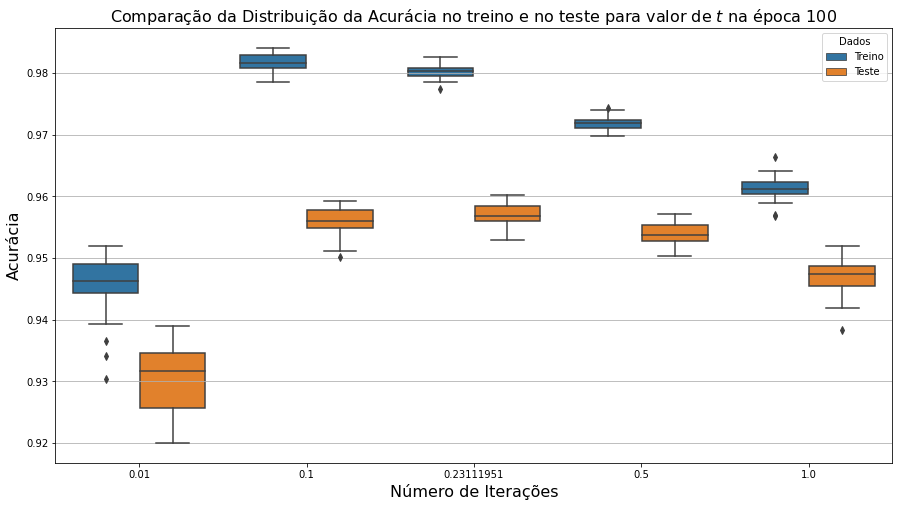

In [64]:
tab_aux1 = acuracia_treino_eta[['passo_inicial','semente','100']]
tab_aux1 = tab_aux1.assign(Dados='Treino')

tab_aux2 = acuracia_teste_eta[['passo_inicial','semente','100']]
tab_aux2 = tab_aux2.assign(Dados='Teste')
tab_aux = pd.concat([tab_aux1,tab_aux2],axis=0)

plt.figure(figsize=(15,8))
sns.boxplot(data = tab_aux, x = 'passo_inicial', y = '100', hue = 'Dados')
plt.title('Comparação da Distribuição da Acurácia no treino e no teste para valor de $t$ na época 100', fontsize = 16)
plt.xlabel('Número de Iterações', fontsize = 16)
plt.ylabel('Acurácia', fontsize = 16)
plt.grid(axis='y')
plt.show()